# Machine Learning & Data Science A-Z: Hands-on Python 2021
sources - https://www.udemy.com/course/data-science-machine-learning-a-z-hands-on-python/

### SVR Hyper Parameter Tuning

In [1]:
#From previous study
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd 
import matplotlib as plt

In [2]:
Boston_P = load_boston()

In [3]:
# Indenpendent and Dependent Variable X and Y
x = Boston_P.data # Independent
y = Boston_P.target # Dependent

In [4]:
# To Split Train and Test = 0.75/0.25
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,train_size= 0.75,random_state=76)

In [5]:
# Normalizing a data - for making computer read it much better
from sklearn.preprocessing import MinMaxScaler
Sc = MinMaxScaler(feature_range=(0,1))
x_train = Sc.fit_transform(x_train)
x_test = Sc.fit_transform(x_test)

In [6]:
# Reshaping y-train
y_train = y_train.reshape(-1,1)
y_train = Sc.fit_transform(y_train)

In [8]:
# Importing SVR method and HPT
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [12]:
parameters = {'kernel':['rbf','linear'] ,
             'gamma':[1,0.1,0.01]}
grid =GridSearchCV(SVR(),parameters,refit=True,verbose=2,scoring='neg_mean_squared_error')

In [14]:
grid.fit(x,y)
best_params = grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END ................................gamma=1, kernel=rbf; total time=   0.0s
[CV] END .............................gamma=1, kernel=linear; total time=   1.1s
[CV] END .............................gamma=1, kernel=linear; total time=   1.7s
[CV] END .............................gamma=1, kernel=linear; total time=   1.4s
[CV] END .............................gamma=1, kernel=linear; total time=   2.5s
[CV] END .............................gamma=1, kernel=linear; total time=   1.3s
[CV] END ..............................gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............................gamma=0.1,

### K-Means Hyper Parameter Tuning

In [19]:
K_inertia = []

In [21]:
for i in range(1,10):
    KMNS = KMeans(n_clusters=i, random_state=44)
    KMNS.fit(Data_iris)
    K_inertia.append(KMNS.inertia_)

NameError: name 'Data_iris' is not defined

### K-NN Hyper Parameter Tuning

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

In [24]:
x= iris.data
y=iris.target

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,
                                                train_size= 0.70, random_state = 22,
                                                shuffle =True,
                                                stratify = y)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
kNN_accuracy_test = []


In [30]:
for k in range (1,50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=1)
    kNN.fit(x_train,y_train)
    kNN_accuracy_test.append(kNN.score(x_test,y_test))
    

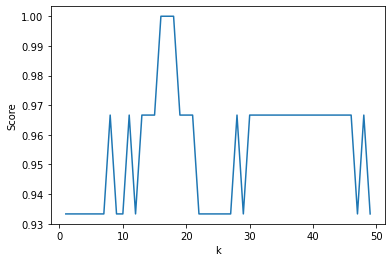

In [31]:
plt.plot(np.arange(1,50),kNN_accuracy_test,label = 'test')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

### Overfitting and Underfitting

In [32]:
kNN_accuracy_test = []
kNN_accuracy_train = []

In [33]:
for k in range (1,50):
    kNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=1)
    kNN.fit(x_train,y_train)
    kNN_accuracy_train.append(kNN.score(x_train,y_train))
    kNN_accuracy_test.append(kNN.score(x_test,y_test))

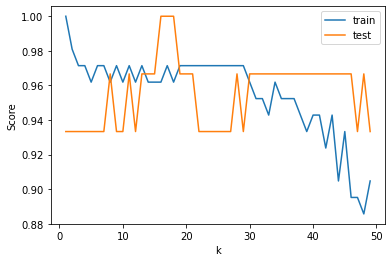

In [35]:
plt.plot(np.arange(1,50),kNN_accuracy_train,label = 'train')
plt.plot(np.arange(1,50),kNN_accuracy_test,label = 'test')
plt.xlabel('k')
plt.ylabel('Score')
plt.legend()
plt.show()